The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.



In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('/content/twitter_training.csv')
df.head()

,id,name,label,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [27]:
df.shape

(74682, 4)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74682 non-null  int64 
 1   name    74682 non-null  object
 2   label   74682 non-null  object
 3   tweet   73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df.isnull().sum()

,0
id,0
name,0
label,0
tweet,686


In [32]:
df.dropna(inplace=True)

In [34]:
df.rename(columns={'name': 'Topic'},inplace=True)

In [35]:
df.head()

,id,Topic,label,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [36]:
df.duplicated().sum()

2341

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.duplicated().sum()

0

# Visualization of count of different topics

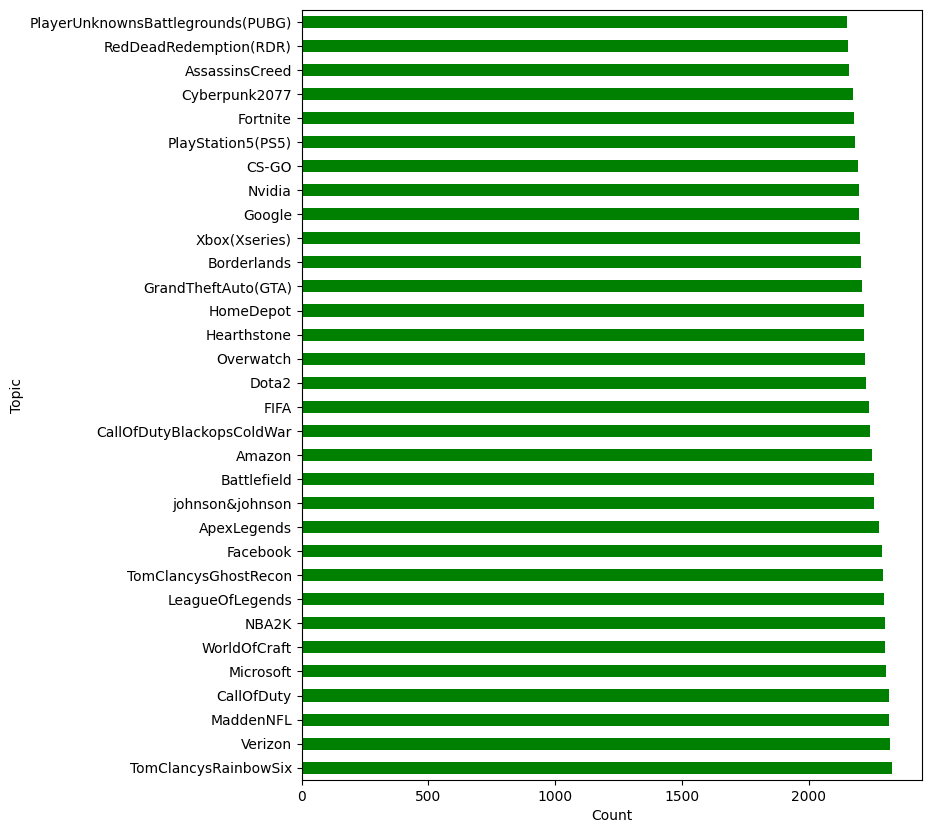

In [39]:
plt.figure(figsize=(8,10))
df['Topic'].value_counts().plot(kind='barh',color='g')
plt.xlabel("Count")
plt.show()

# Preprocessing the dataset

In [40]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [41]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [42]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,Topic,label,tweet,clean_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [43]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^0-9]", " ")
df.head()

,id,Topic,label,tweet,clean_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [44]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,Topic,label,tweet,clean_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands will murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"coming borders will kill all,"
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"getting borderlands will kill all,"
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"coming borderlands will murder all,"
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"getting borderlands will murder all,"


In [ ]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

,clean_tweet
0,"[getting, borderlands, will, murder]"
1,"[coming, borders, will, kill, all,]"
2,"[getting, borderlands, will, kill, all,]"
3,"[coming, borderlands, will, murder, all,]"
4,"[getting, borderlands, will, murder, all,]"


In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

,clean_tweet
0,"[get, borderland, will, murder]"
1,"[come, border, will, kill, all,]"
2,"[get, borderland, will, kill, all,]"
3,"[come, borderland, will, murder, all,]"
4,"[get, borderland, will, murder, all,]"


In [ ]:
# # combine words into single sentence
# for i in range(len(tokenized_tweet)):
#     tokenized_tweet[i] = " ".join(tokenized_tweet[i])

# df['clean_tweet'] = tokenized_tweet
# df.head()

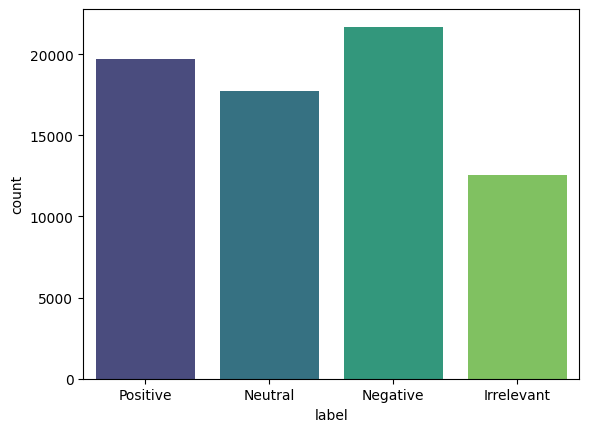

In [45]:
sns.countplot(x = 'label',data=df,palette='viridis')
plt.show()

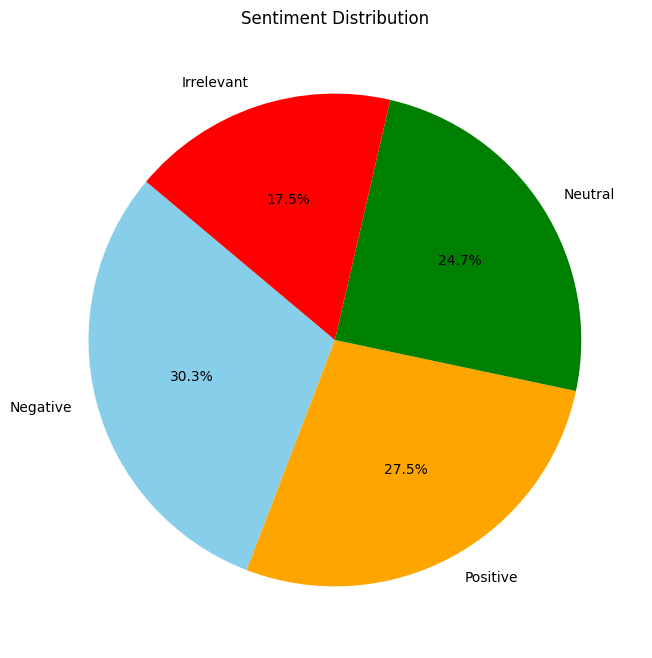

In [20]:
# Calculate the counts for each sentiment
sentiment_counts = df['label'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()


 **Most topic has negative sentiment**

<Axes: xlabel='label'>

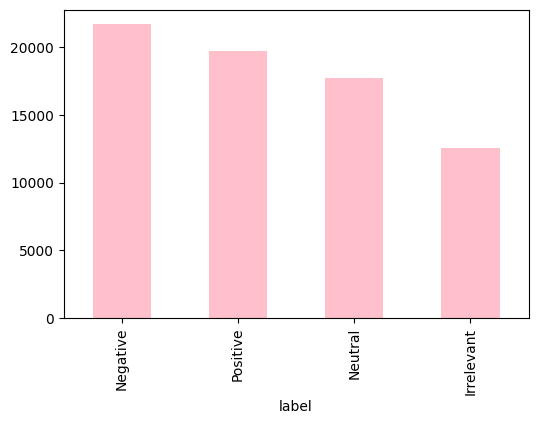

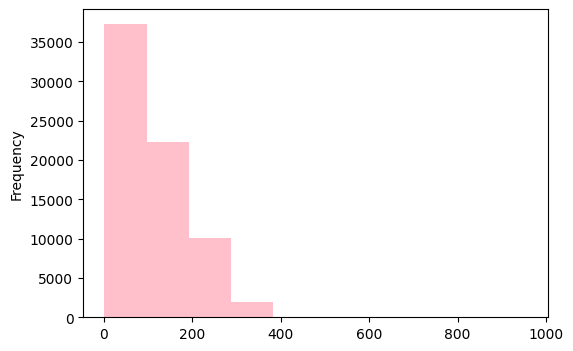

In [46]:
# checking the distribution of tweets in the data
length_train = df['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))

# Setiment Distribution Topic-Wise


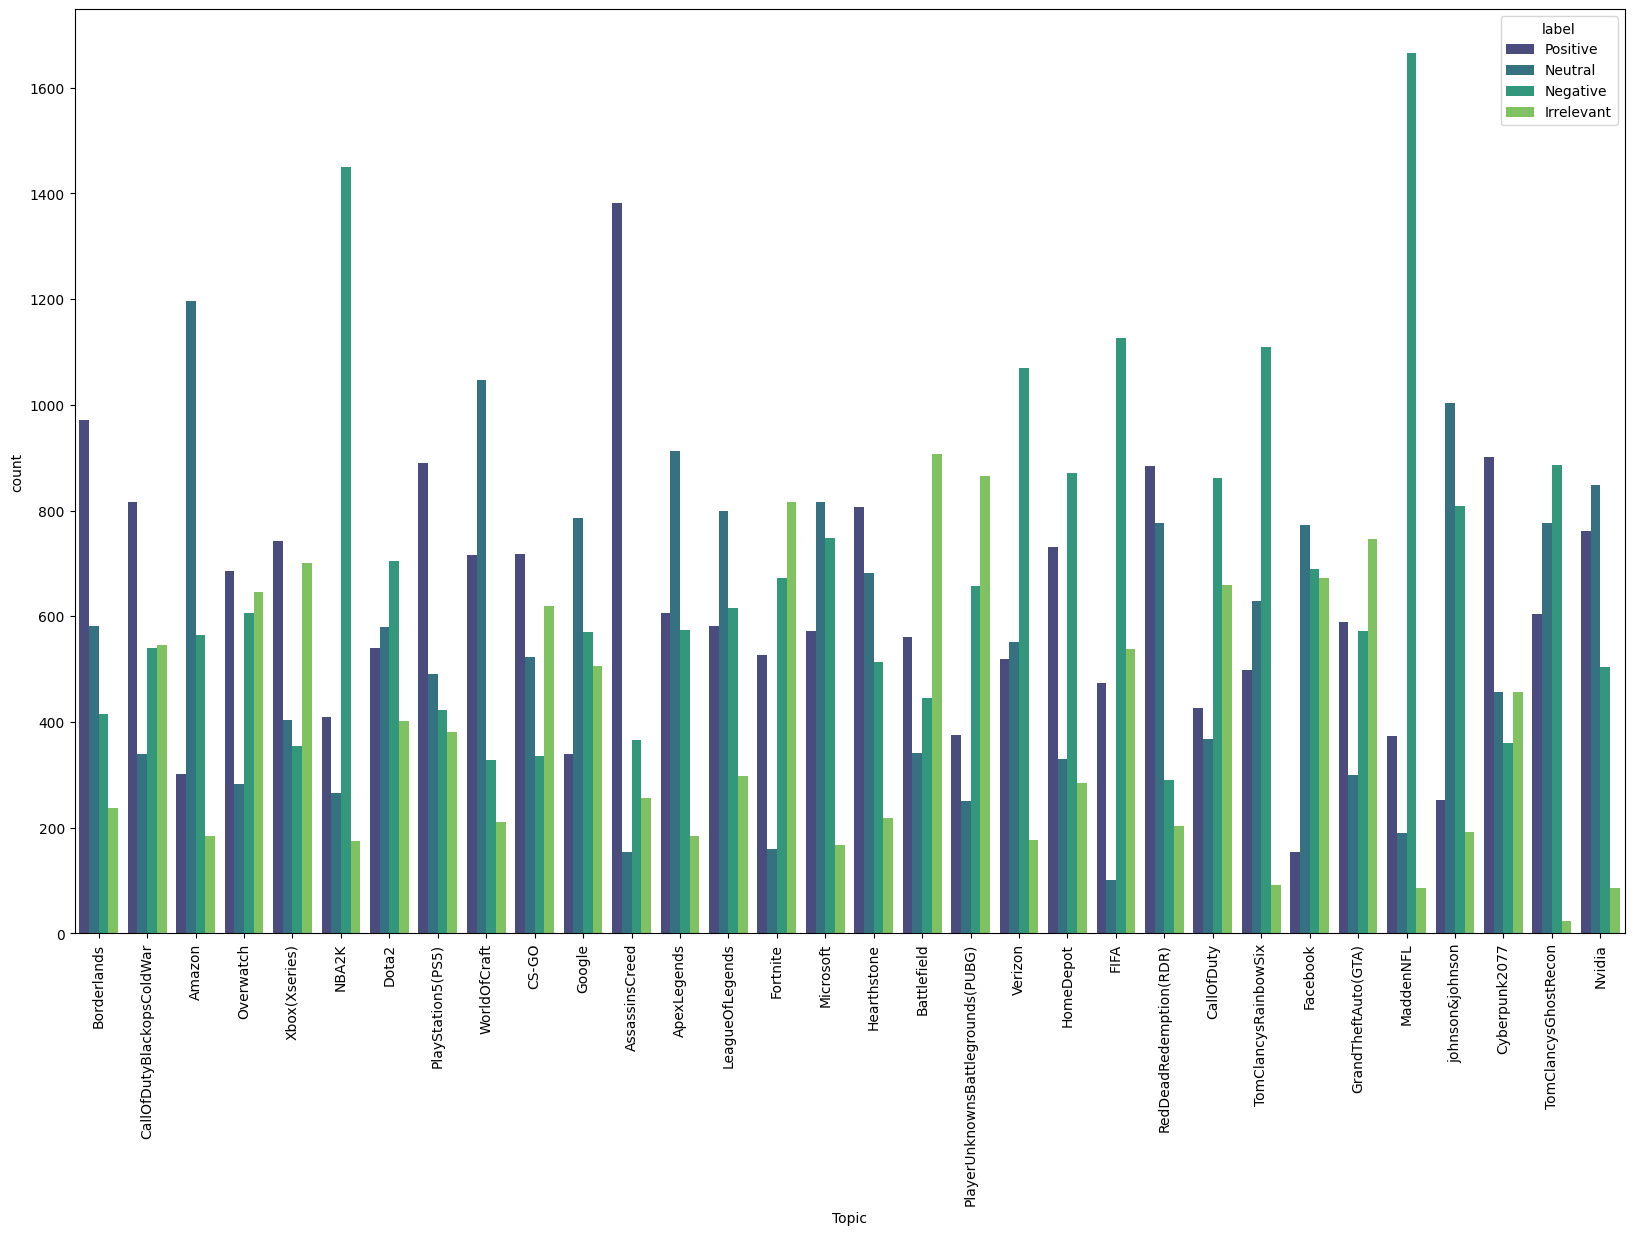

In [47]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=df,palette='viridis',hue='label')
plt.xticks(rotation=90)
plt.show()

In [48]:
## Group by Topic and Sentiment
topic_wise_sentiment = df.groupby(["Topic", "label"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = df['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

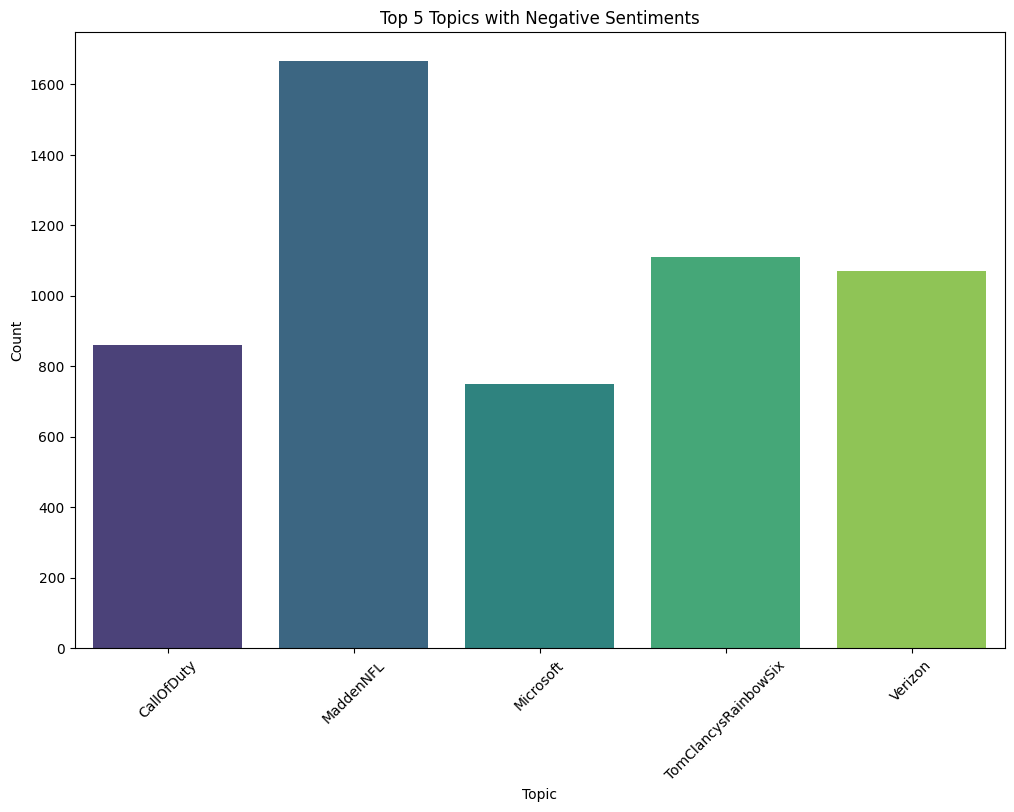

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['label'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

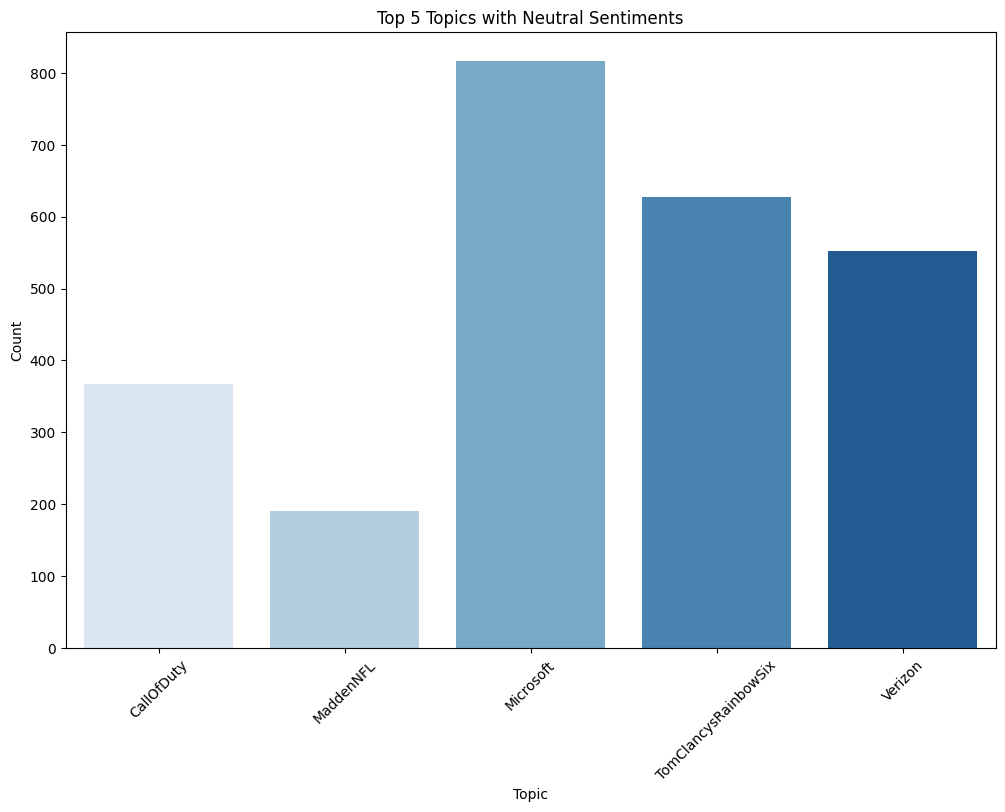

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['label'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

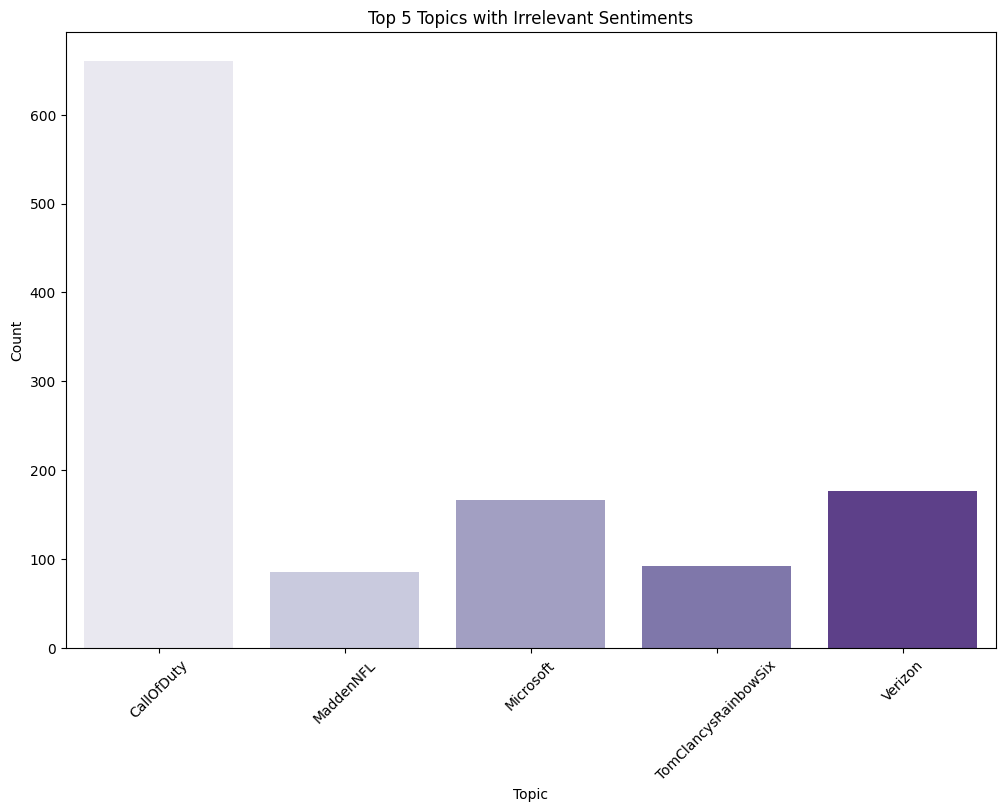

In [53]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['label'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

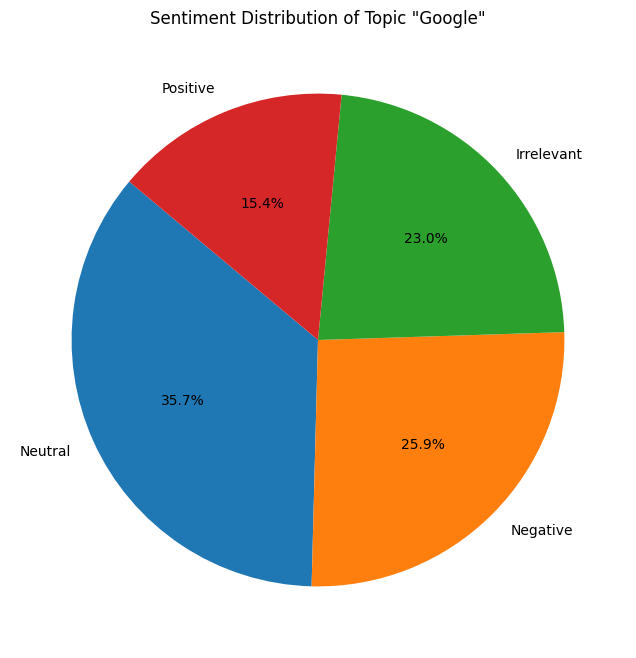

In [54]:
#Filter the dataset to include only entries related to the topic 'Google'
google_data = df[df['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

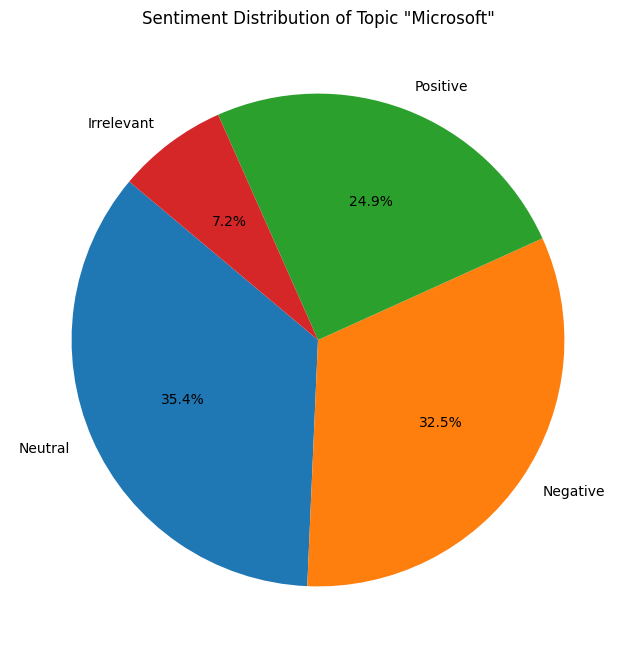

In [56]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = df[df['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [59]:
df['msg_len'] = df['tweet'].apply(len)

In [60]:
df

,id,Topic,label,tweet,clean_tweet,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands will murder,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"coming borders will kill all,",51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"getting borderlands will kill all,",50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"coming borderlands will murder all,",51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"getting borderlands will murder all,",57
...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Just realized that Windows partition like year...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Just realized that window partition years behi...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Just realized windows partition years behind N...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,Just realized between windows partition like b...,159


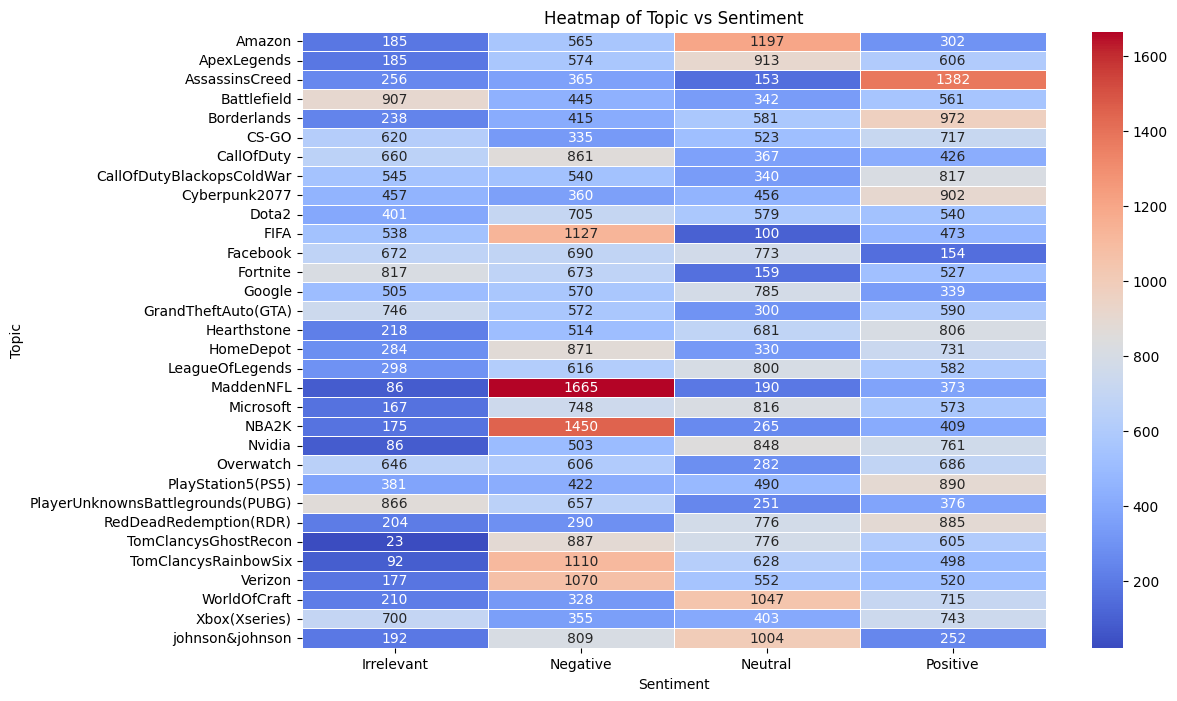

In [61]:
# Create the crosstab
crosstab = pd.crosstab(index=df['Topic'], columns=df['label'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()

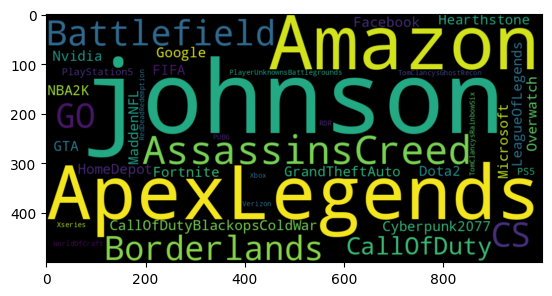

In [62]:
from wordcloud import WordCloud
topic_list = ' '.join(crosstab.index)


wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

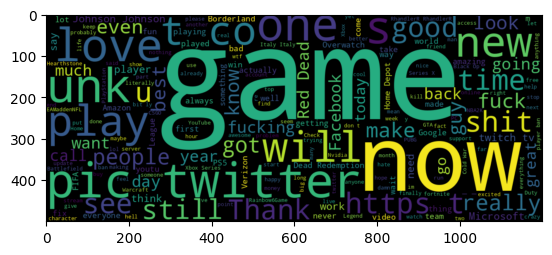

In [64]:
corpus = ' '.join(df['tweet'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')

# Conclusion

**Most Frequent Topic**: The topic "TomClancyRainbowSix" emerges as the most frequent topic of discussion among the analyzed Twitter data. This suggests a significant level of engagement or interest in this particular topic within the Twitter community.



**Sentiment Distribution**: The sentiment analysis reveals that the majority of topics exhibit a negative sentiment, accounting for 30.3% of the sentiments observed. Following negative sentiment, positive sentiment is the next most prevalent, comprising 27.5% of the sentiments. Neutral sentiment closely follows at 24.7%, indicating a relatively balanced distribution between positive and neutral sentiments. Irrelevant sentiments, although less prevalent, still constitute a notable portion at 17.5%.